In [2]:
from sympy import var, Matrix, Rational, eye, init_printing,simplify, solve, sqrt, evalf
init_printing()

#Optimal splittings for 2-stage, 2nd-order RK methods

Here is a parameterization of the whole family of methods.

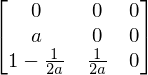

In [3]:
r=var('r')
a = var('a')
one = Rational(1)
K = Matrix( [[0,0,0],[a,0,0],[one - one/(2*a),1/(2*a),0]])
I = eye(3)
e = Matrix( [[1],[1],[1]] )
K

Next we compute the canonical Shu-Osher form:

In [4]:
G = I+r*K
Ginv = G.inv()
alpha_r = Ginv*K
d_r = Ginv*e

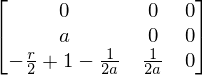

In [5]:
alpha_r

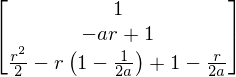

In [6]:
d_r

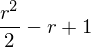

In [7]:
simplify(d_r[-1])

Now we have different cases depending on the sign of alpha_r[3,1].  First we do the case where it is negative (which happens certainly for $0\le a \le 1/2$).  We follow Algorithm 2.

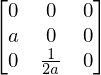

In [10]:
alpha_r_p = alpha_r.copy()
alpha_r_p[2,0] = 0
alpha_r_m = 0*alpha_r
alpha_r_m[2,0] = -alpha_r[2,0]
alpha_r_p

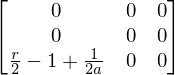

In [11]:
alpha_r_m

In [12]:
H = I-2*alpha_r_m
Hinv = H.inv()
Hinv
alpha_r_up = Hinv*alpha_r_p
alpha_r_down  = -Hinv*alpha_r_m
gamma_r = (I - a*alpha_r_down)*d_r

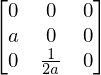

In [13]:
alpha_r_up

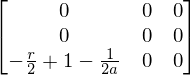

In [14]:
alpha_r_down

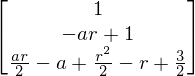

In [16]:
gamma_r[-1]=simplify(gamma_r[-1])
gamma_r

Now perform the "move" step:

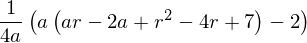

In [18]:
X = gamma_r[-1]/2 + alpha_r_down[2,0]
simplify(X)

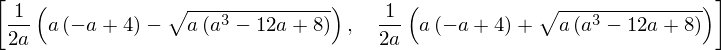

In [20]:
S=solve(X,r)
Z=simplify(S)
Z

This is a general solution.  Here's what we get for $a=1/2$:

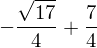

In [21]:
Z[0].subs({a:one/2})

In [22]:
import numpy as np
(7-np.sqrt(17))/4

Now we check that the algorithmic implementation in NodePy gives the same result:

In [23]:
from nodepy import rk

In [24]:
x = one/2
rk2 = rk.RK22_family(one/(2*x))
print rk2

Runge-Kutta Method

 0   |
 1/2 | 1/2
_____|__________
     | 0    1


In [25]:
rk2.optimal_perturbed_splitting()

(0.7320508075689639,
 array([1.00000000000000, 0.0, 0.0], dtype=object),
 array([[0, 0, 0],
        [0.683012701892241, 0, 0],
        [-7.49955653134293e-14, 0.732050807568964, 0]], dtype=object),
 array([[0, 0, 0],
        [0.316987298107759, 0, 0],
        [0.267949192431111, 0, 0]], dtype=object))

In [26]:
(x-1+sqrt(3*x**2-2*x+1))/x

In [29]:
np.sqrt(11)-3

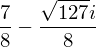

In [107]:
1-x/2 - sqrt(x**2-8)/2

In [109]:
S=solve(X,a)

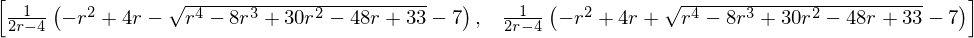

In [110]:
S

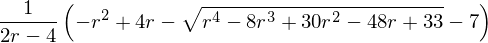

In [121]:
S[0].subs({a:one/4})